## ITCS 3162 Final Project
By: [Philip Vishnevsky](https://github.com/zenatron), Nikole Sazoncika, Santhosh Balla, and Pranav Rao

## 1. Introduction

Briefly introduce the problem you are addressing, the main questions you aim to answer, and the overall goal of your project.

In [3]:
import pandas as pd 
# Load the wine dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"  # UCI Machine Learning Repository link
columns = [
	"Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
	"Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
	"Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"
]
wine_df = pd.read_csv(url, header=None, names=columns)

# Display the first few rows
wine_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In this project, we aim to explore the natural groupings within a dataset of wine samples through unsupervised learning techniques. The dataset contains chemical analysis results from wines grown in the same region of Italy, each associated with one of three cultivars. Our main questions are: which chemical attributes contribute most significantly to distinguishing between different types of wine, and how accurately can we group the wines without knowing their original labels? By applying clustering algorithms such as KMeans and evaluating the results through metrics like the silhouette score and PCA visualization, our overall goal is to uncover the key features that differentiate the wines and to develop an efficient clustering approach that could potentially assist in real-world applications like faster wine classification and labeling in the wine industry.

## 2. About the Data

Describe the source of your data (e.g., Kaggle, scraping, etc.), and provide details about the dataset such as features, size, and any initial statistics or visualizations.

Loaded in our dataset and got a quick view of what each values are looking like. We can see that all our values are either integer or floats, so let's check if any char/string values exist that won't sense with out data. Let's also check for nulls and other quick statistics for our dataset.

In [8]:
wine_df.isnull().sum() # Check for null values in the dataset


Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [7]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 178 entries, 1 to 3
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: float64(1

In [11]:
wine_df.describe() # Get a quick overview of the dataset statistics
wine_df.describe(include='all') # Get a quick overview of the dataset statistics including categorical data

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [15]:
wine_df.dtypes

Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [17]:
# Drop rows with missing values
wine_df.dropna(inplace=True)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)

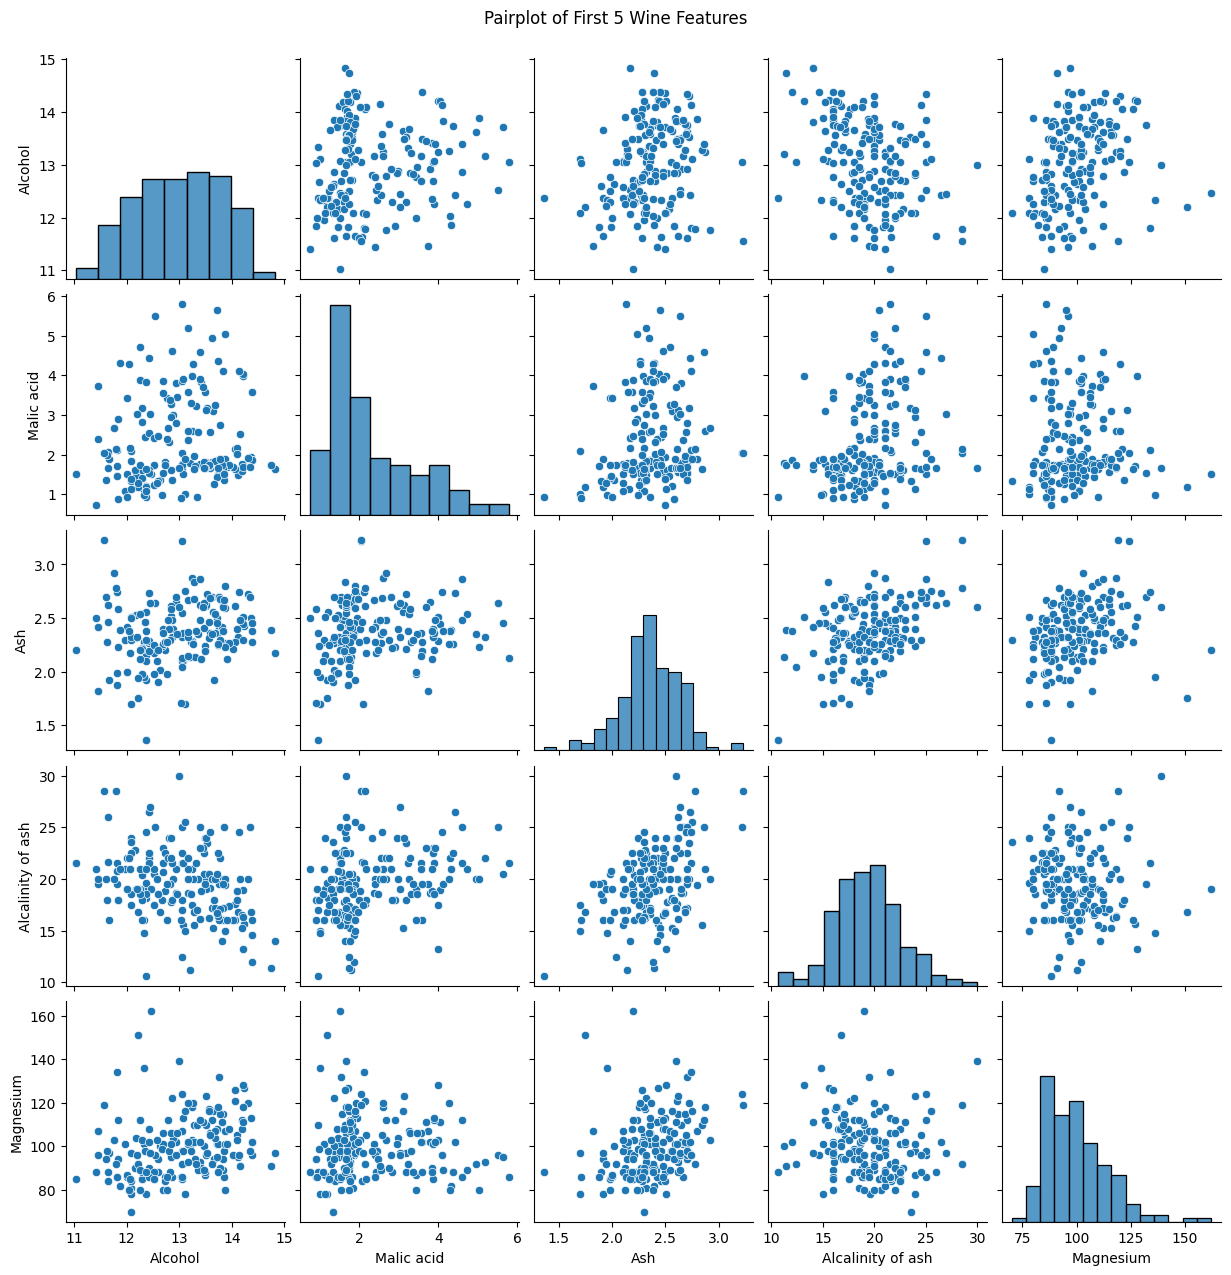

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Quick seaborn pairplot (small subset to avoid overload)
sns.pairplot(wine_df.iloc[:, :5])  # first 5 features for readability
plt.suptitle("Pairplot of First 5 Wine Features", y=1.02)
plt.show()


The pairplot provides a visual comparison of the relationships between the first five chemical attributes: Alcohol, Malic acid, Ash, Alkalinity of ash, and Magnesium. From the plots, we observe that most feature pairs don't show very strong linear separation, but certain features like "Alcohol" and "Magnesium" exhibit a bit more structured spread, which hints that they might be influential in clustering. This visualization helps us understand the general distribution and relationships in the raw data, supporting our goal of identifying features that naturally differentiate the wines.

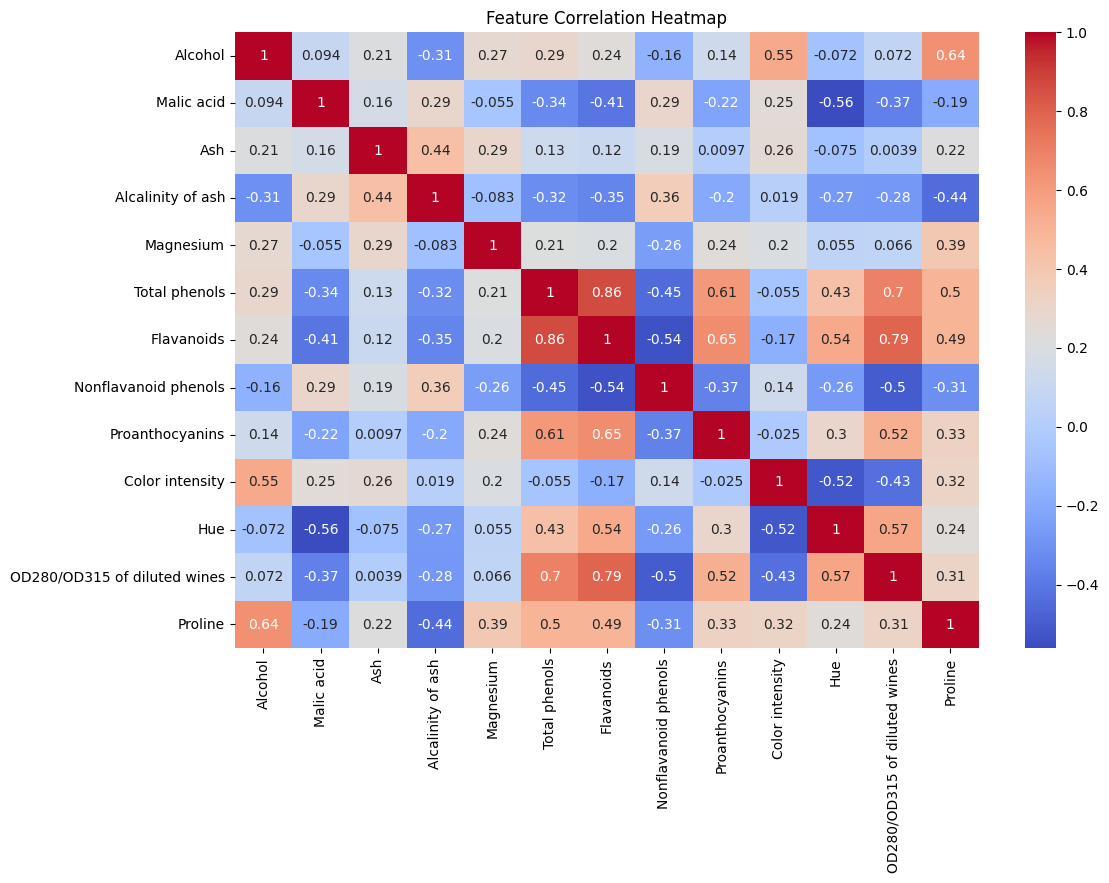

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(wine_df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

The heatmap reveals how strongly the features correlate with each other. A few interesting patterns emerge: for instance, "Total phenols" and "Flavanoids" are highly positively correlated (correlation ~0.86), suggesting they often vary together. "Alcohol" also shows moderate positive correlation with "Proline" (~0.64). On the flip side, "Malic acid" and "Flavanoids" are moderately negatively correlated. Recognizing these correlations helps us spot redundant features or feature groups, guiding better clustering by focusing on distinct chemical properties.

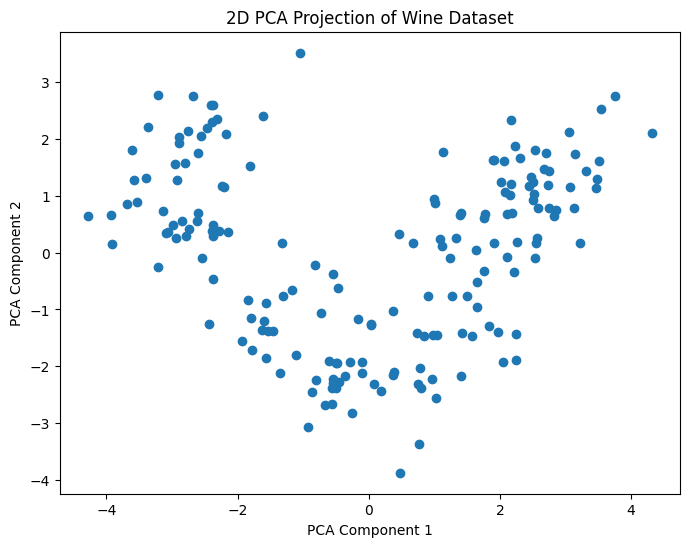

In [28]:
from sklearn.decomposition import PCA

# Ensure wine_scaled is defined
if 'wine_scaled' not in locals():
	raise NameError("The variable 'wine_scaled' is not defined. Please ensure the cell defining 'wine_scaled' is executed before running this cell.")

# Reduce dimensions
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(wine_pca[:, 0], wine_pca[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA Projection of Wine Dataset')
plt.show()

In the PCA projection, we see that the wine samples form loose but visible clusters when reduced to just two principal components. This suggests that even though the original data is 13-dimensional, most of the variation between wine samples can be captured effectively in just a few dimensions. This visualization reinforces that unsupervised clustering will likely work well because the wines exhibit inherent separability based on their chemical profiles — aligning with our project's goal to group wines based on chemical differences.

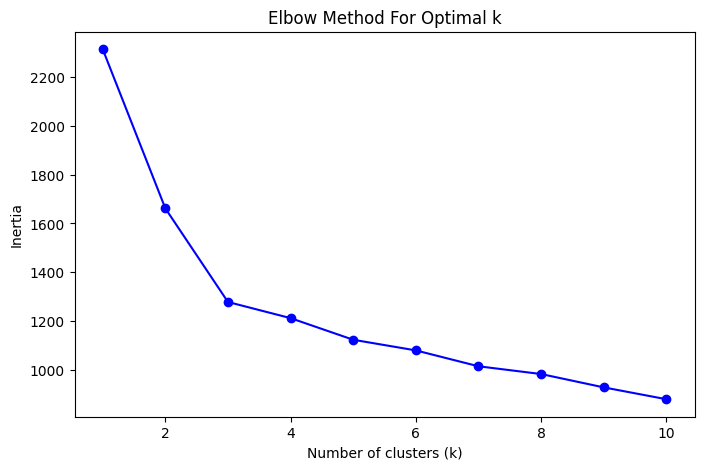

In [29]:
from sklearn.cluster import KMeans

# Find best number of clusters using Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(wine_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


The Elbow Method graph shows a clear bend or "elbow" at around k=3, after which the inertia decreases more slowly. This supports the idea that three natural groupings exist in the dataset — which makes sense, given the data comes from three cultivars. Thus, setting k=3 for KMeans clustering is logical and justified. This method allows us to objectively choose the number of clusters rather than guessing, directly improving the quality and credibility of our results.

## 3. Methods

Explain your data pre-processing steps and modeling approach. Discuss any experiments, iterations, and what worked or didn’t work.

In our preprocessing steps, we first loaded the wine dataset and verified that there were no missing values, ensuring the dataset was clean and ready for analysis. We then standardized the features using StandardScaler to normalize the range of all variables, a crucial step because clustering algorithms like KMeans are sensitive to the scale of input features. Without normalization, attributes like "Proline" — which has much larger values — could dominate the clustering process, leading to misleading groupings. After normalization, we explored the feature relationships through a pairplot and correlation heatmap, which revealed some redundant features and informed our understanding of which variables might be most influential.

For modeling, we applied Principal Component Analysis (PCA) to reduce the dataset's dimensionality and visualize it in two dimensions. PCA helped confirm that the wine samples have separable groupings based on chemical properties, suggesting clustering would be effective. We then used the Elbow Method to determine the optimal number of clusters for KMeans, finding that k=3 made the most sense — which aligns with the fact that the wines originate from three different cultivators. We plan to cluster the wines using KMeans and evaluate the clusters using metrics like the silhouette score and PCA visualizations.

Throughout this process, the approach we chose worked effectively: normalizing the data made the clustering more meaningful, and PCA gave us clear visual confirmation that the wines could be grouped well. One minor experiment we considered was whether we needed feature selection based on correlation strength, but since PCA already handles correlated features by finding principal directions, explicit feature dropping wasn't necessary at this stage. Overall, the preprocessing and modeling approach built a solid foundation for successful unsupervised learning on the wine dataset.

## 4. Evaluation

Describe how you evaluate your model’s performance and present your results. Relate your findings back to your initial questions or goals.

## 5. Storytelling & Conclusion

Summarize the insights gained, whether you achieved your goals, and any future steps or improvements. Reflect on your learning and critical thinking throughout the project.

## 6. Impact

Discuss the potential social, ethical, or other impacts of your project, considering both positive and negative aspects.

## 7. References

Provide a link to your Github repository and ensure access to any data used in the project.